---
#Código do pre processamento + modelagem

##Pacotes a serem utilizados

In [ ]:
!pip install pycaret

In [ ]:
# instalando biblioteca de visualização
!pip install sweetviz

In [ ]:
import sweetviz as sv
import missingno as missing
import numpy as np                                    # Numpy
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import warnings
import pickle
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, train_test_split,RepeatedStratifiedKFold,KFold,StratifiedKFold,cross_validate,RandomizedSearchCV,GridSearchCV
from matplotlib import pyplot
from sklearn.metrics import log_loss,f1_score, recall_score, precision_score, accuracy_score, auc
from sklearn import metrics
warnings.filterwarnings('ignore')

---
##Importação da base de dados



In [ ]:
data = pd.read_excel("/content/Tomate.xlsx")

In [ ]:
data

,Estação cultivo,Tratamento,Bloco,colheita,Peso frutos parcela,nº médio frutos,Comprimento médio frutos (cm),Largura média frutos(cm)
0,P-V,1,1,1,309.0,1.5,62.333333,82.333333
1,P-V,1,2,1,0.0,0.0,0.000000,0.000000
2,P-V,1,3,1,196.0,1.0,63.000000,71.000000
3,P-V,2,1,1,15.5,0.5,33.000000,43.000000
4,P-V,2,2,1,152.0,1.5,39.333333,56.000000
...,...,...,...,...,...,...,...,...
535,O-I,11,2,5,920.0,3.0,69.666667,87.333333
536,O-I,11,3,5,1345.0,5.0,69.100000,79.700000
537,O-I,12,1,5,1552.0,5.0,69.900000,92.000000
538,O-I,12,2,5,1340.0,5.0,70.100000,81.900000


In [ ]:
df_acumulado = data.groupby(['Tratamento', 'Bloco', 'colheita','Estação cultivo'])['Peso frutos parcela'].sum().reset_index()

In [ ]:
df_acumulado

,Tratamento,Bloco,colheita,Estação cultivo,Peso frutos parcela
0,1,1,1,O-I,332.0
1,1,1,1,P-V,309.0
2,1,1,2,O-I,1666.5
3,1,1,2,P-V,1489.0
4,1,1,3,O-I,113.0
...,...,...,...,...,...
535,12,3,6,P-V,1486.0
536,12,3,7,P-V,1136.5
537,12,3,8,P-V,308.5
538,12,3,9,P-V,380.5


In [ ]:
data['Peso Acumulado'] = data.groupby(['Tratamento', 'Bloco', 'colheita','Estação cultivo'])['Peso frutos parcela'].cumsum()

In [ ]:
data

,Estação cultivo,Tratamento,Bloco,colheita,Peso frutos parcela,nº médio frutos,Comprimento médio frutos (cm),Largura média frutos(cm),Peso Acumulado
324,P-V,1,1,10,238.0,2.0,71.500000,75.500000,238.0
325,P-V,1,2,10,1901.0,8.5,67.647059,78.941176,1901.0
326,P-V,1,3,10,1469.0,7.0,66.714286,79.714286,1469.0
327,P-V,2,1,10,1706.5,9.0,58.500000,77.055556,1706.5
328,P-V,2,2,10,605.5,2.0,63.000000,71.166667,605.5
...,...,...,...,...,...,...,...,...,...
535,O-I,11,2,5,920.0,3.0,69.666667,87.333333,920.0
536,O-I,11,3,5,1345.0,5.0,69.100000,79.700000,1345.0
537,O-I,12,1,5,1552.0,5.0,69.900000,92.000000,1552.0
538,O-I,12,2,5,1340.0,5.0,70.100000,81.900000,1340.0


In [ ]:
data = data.drop_duplicates(subset=['Tratamento', 'Bloco', 'Estação cultivo'], keep='last')


---
##Visualização dos dados

                                             |          | [  0%]   00:00 -> (? left)


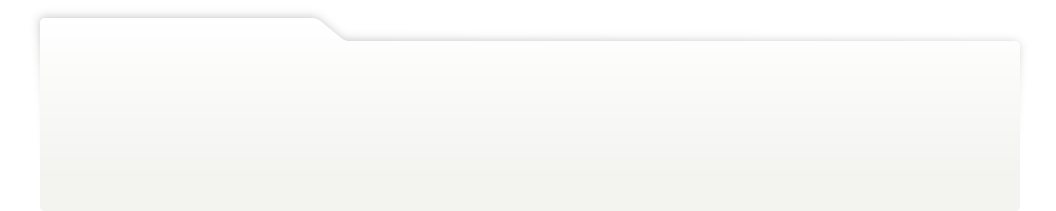
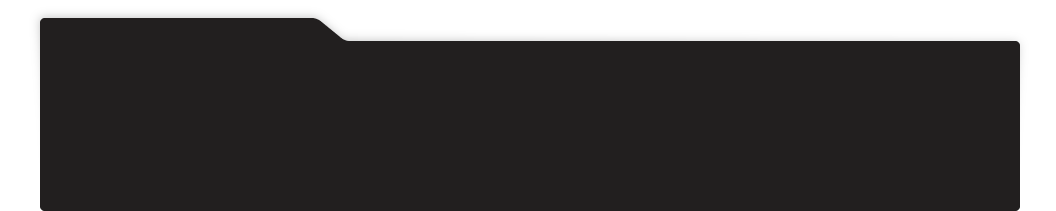
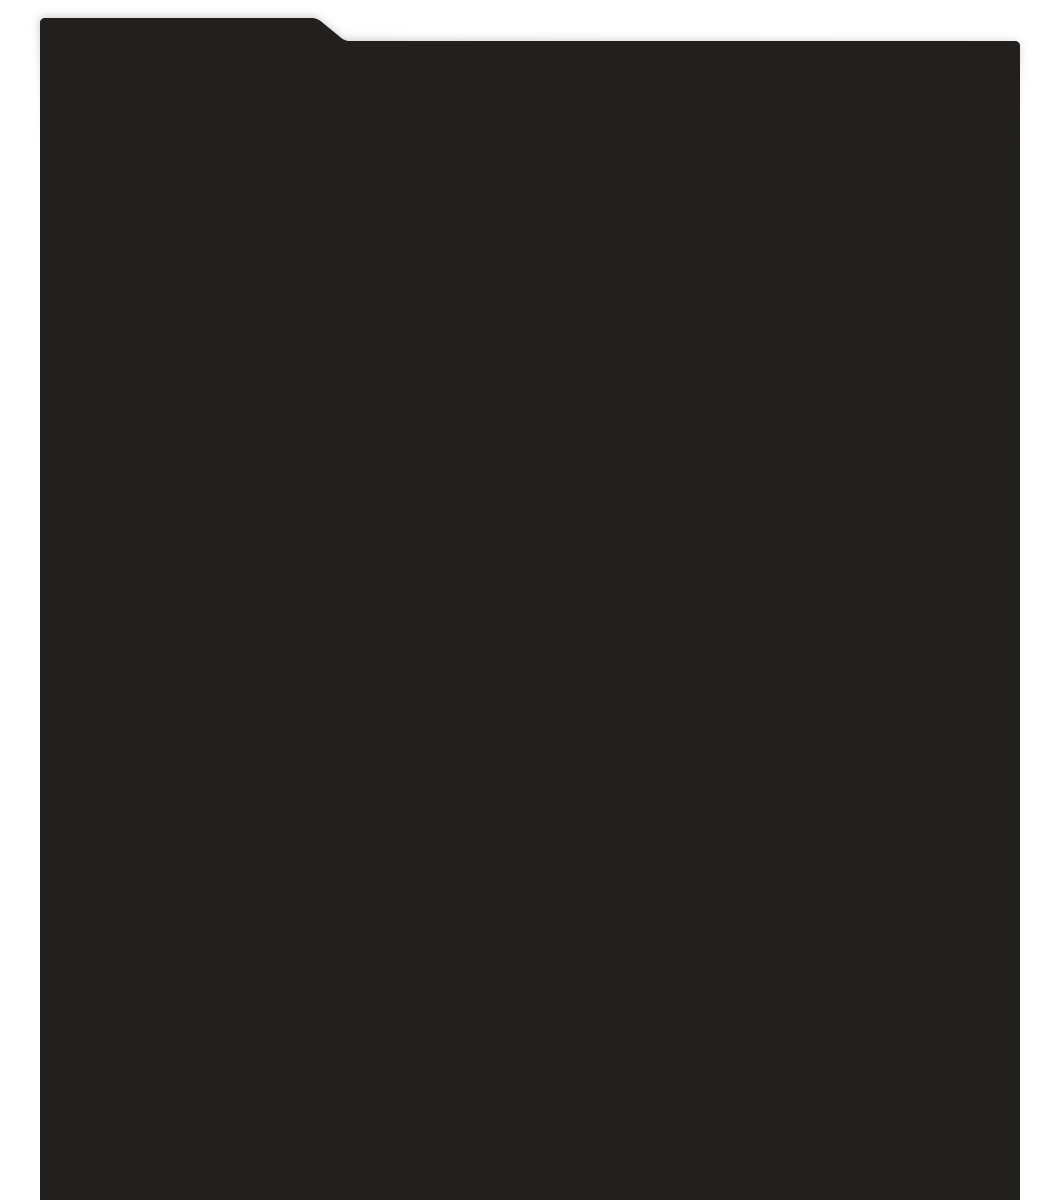
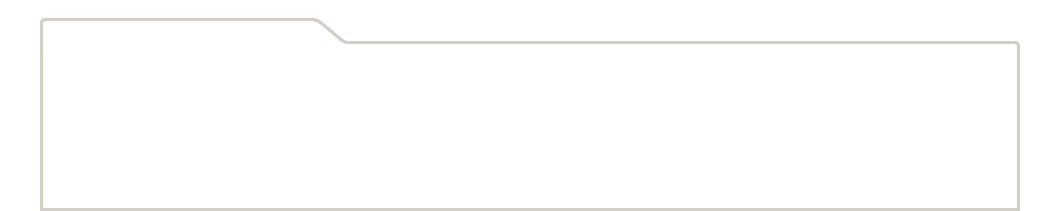
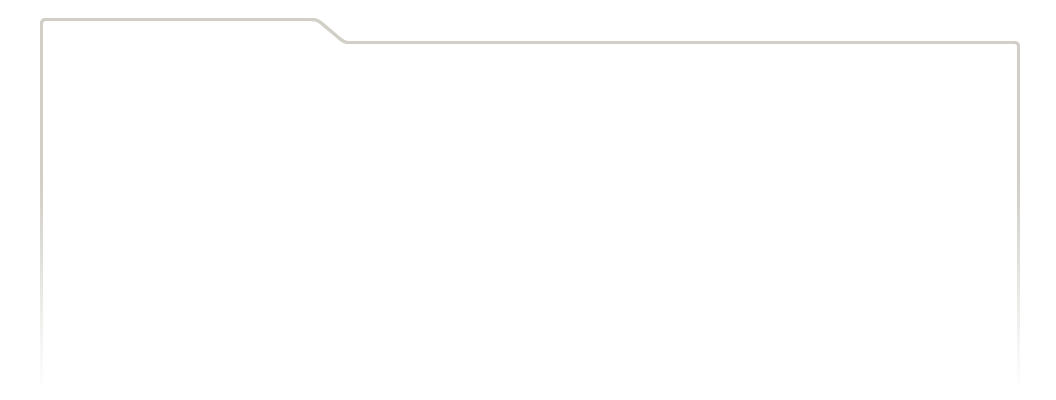
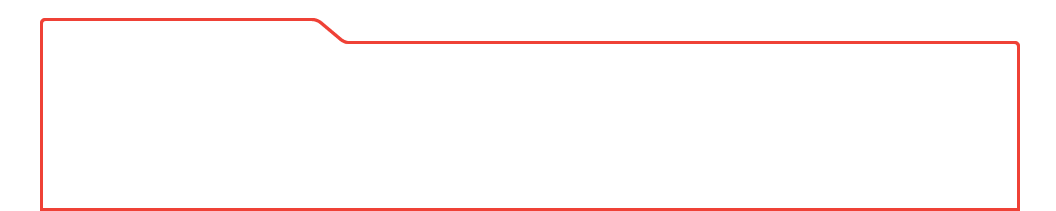
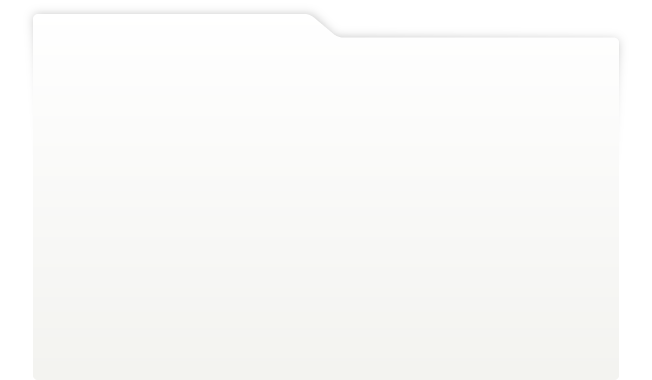
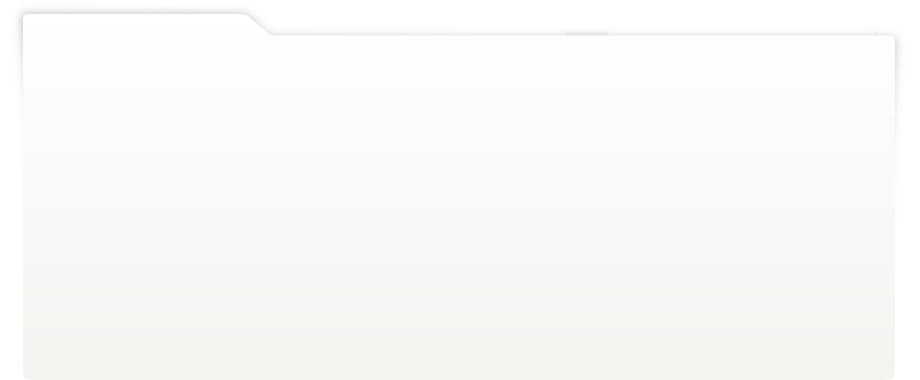
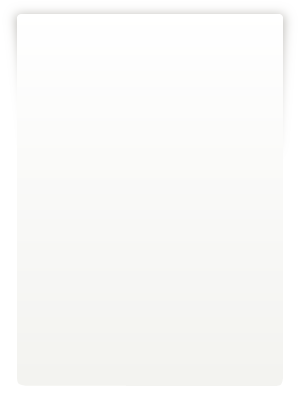
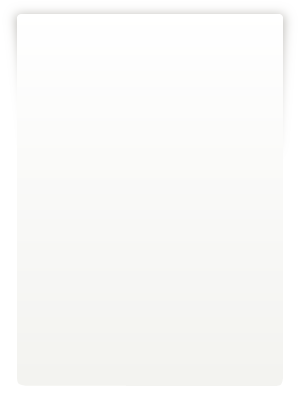
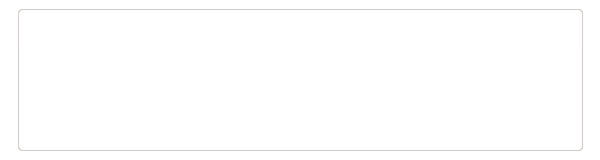
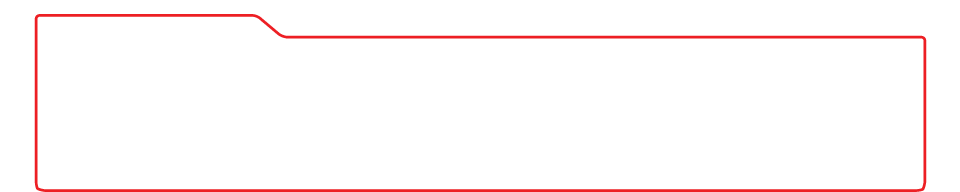
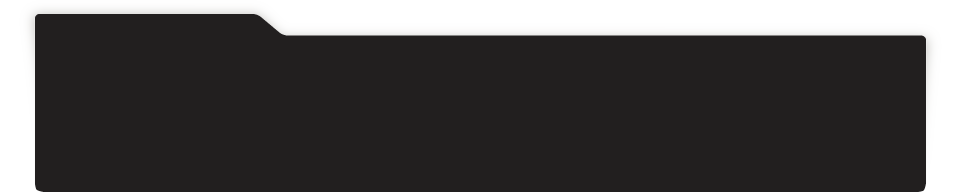
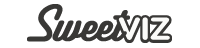
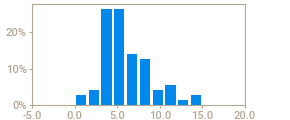
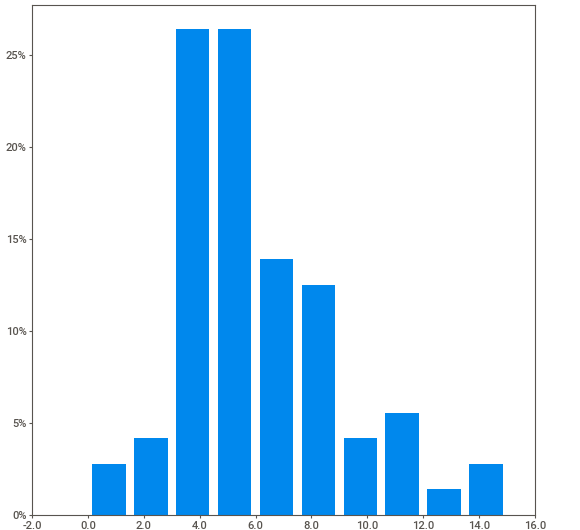
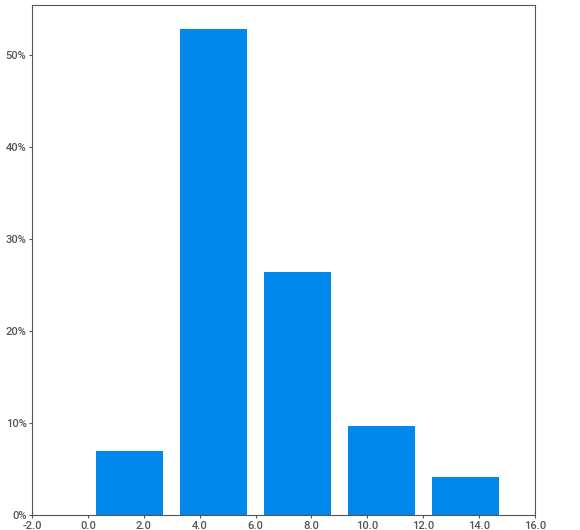
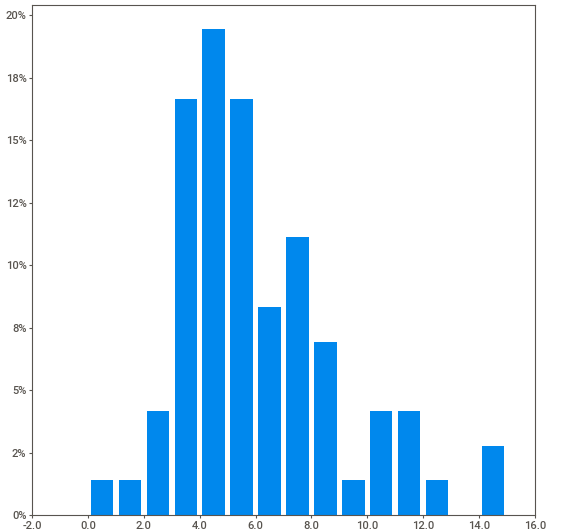
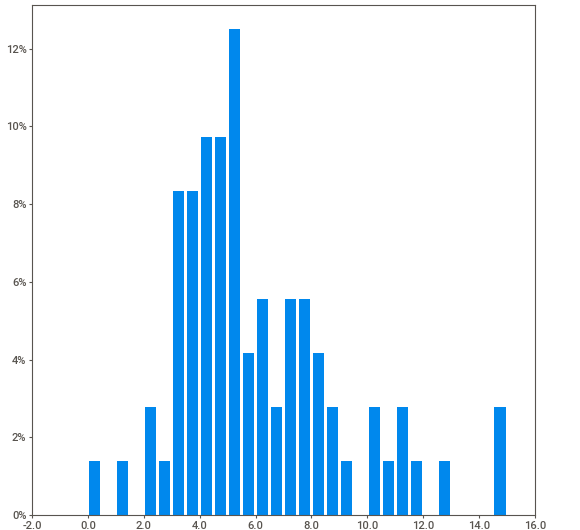
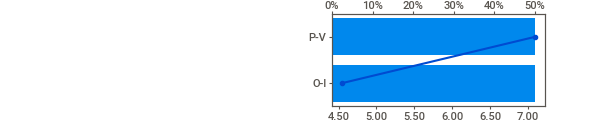
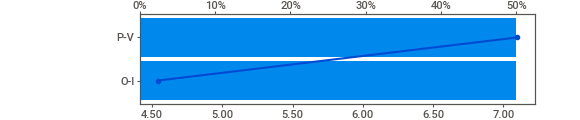
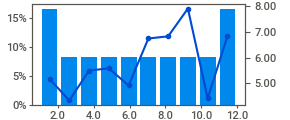
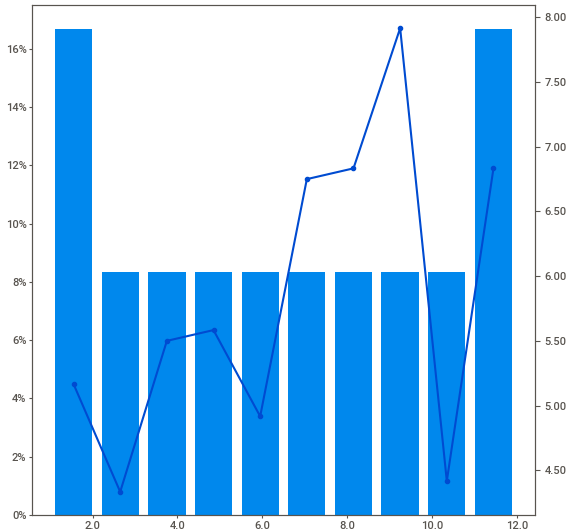
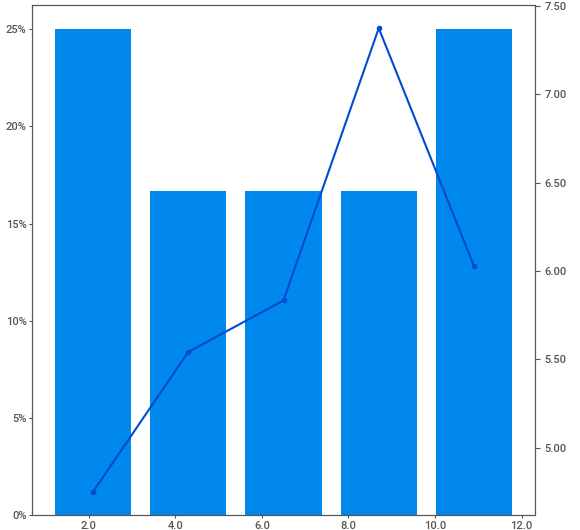
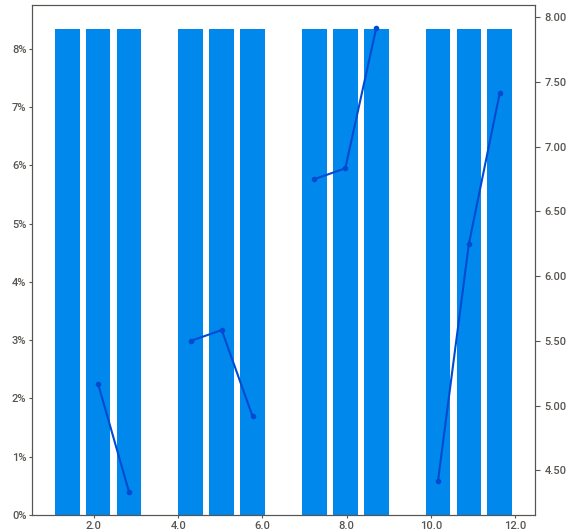
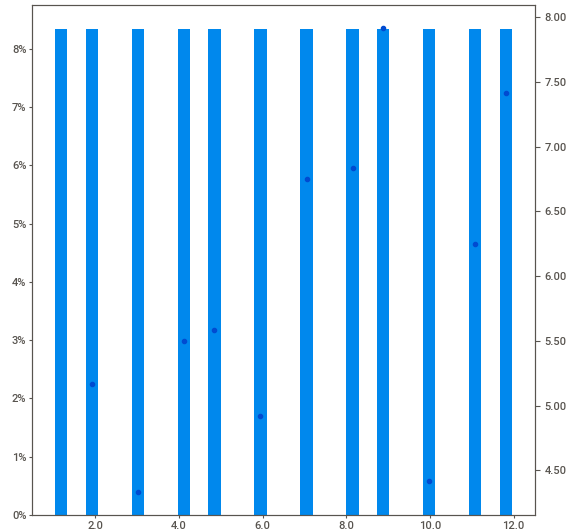
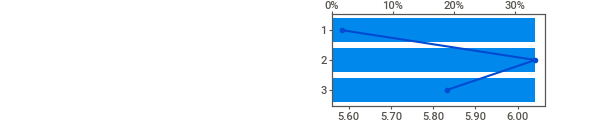
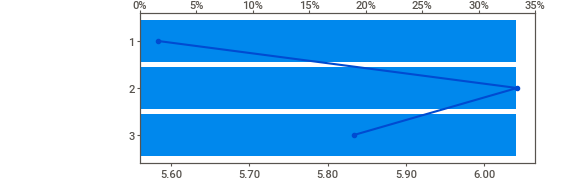
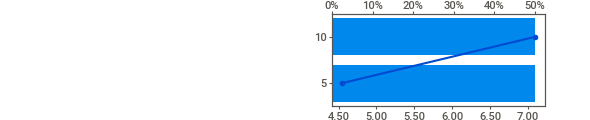
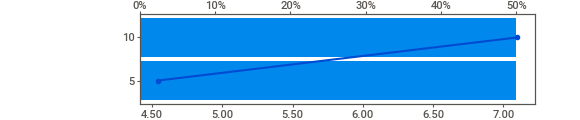
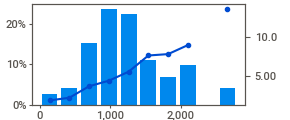
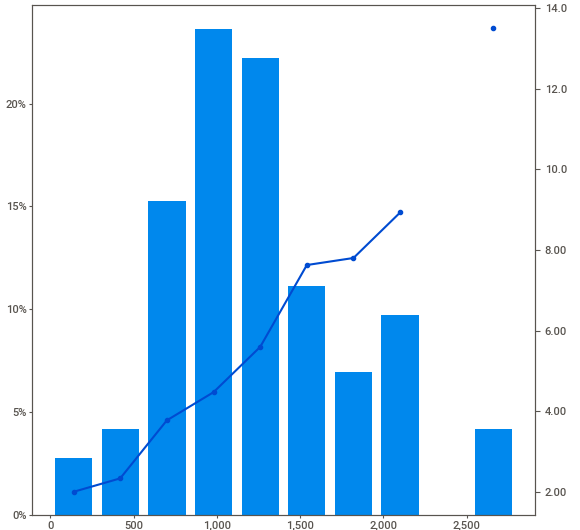
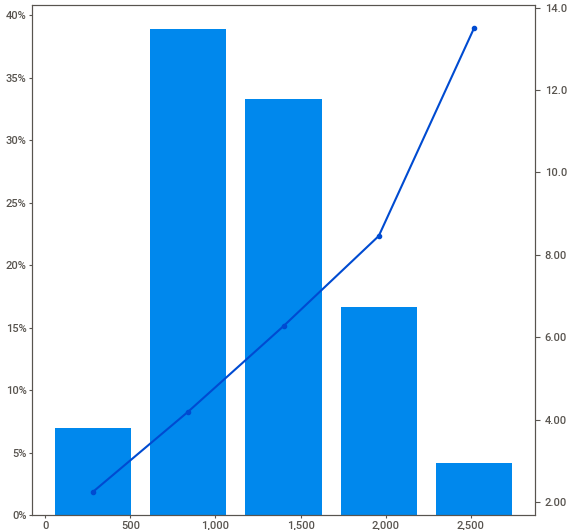
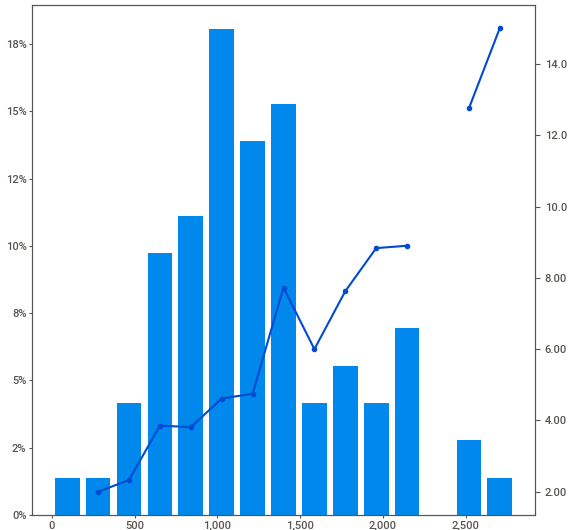
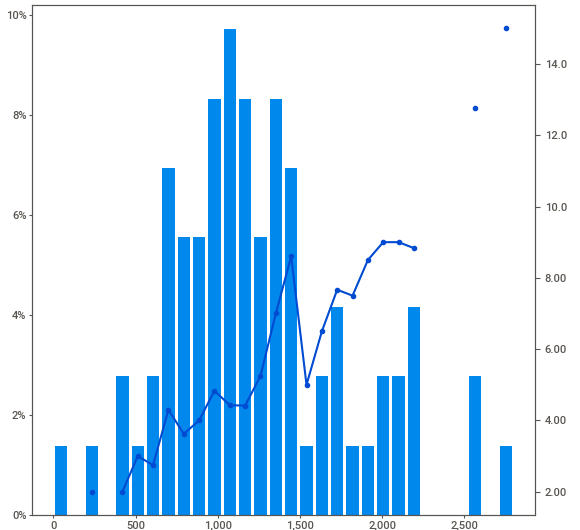
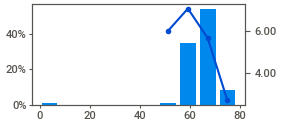
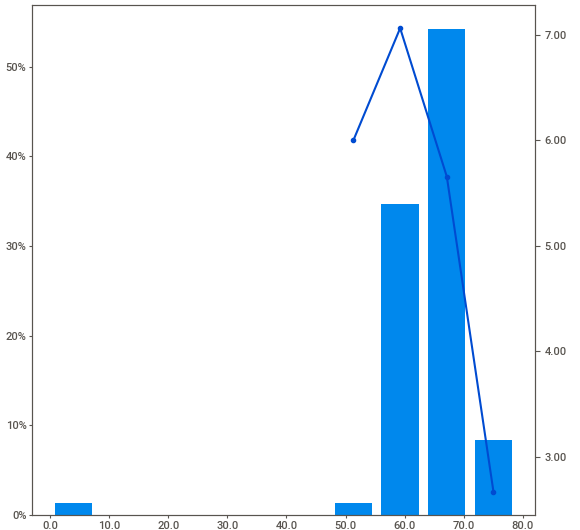
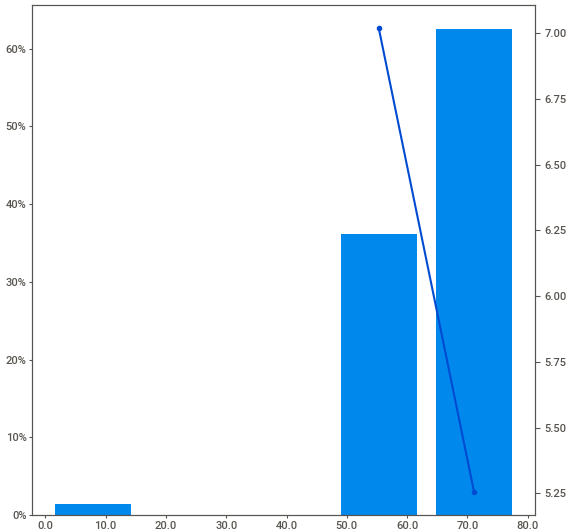
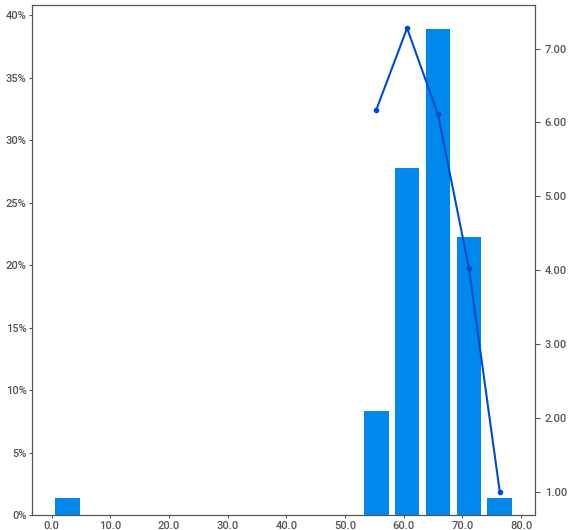
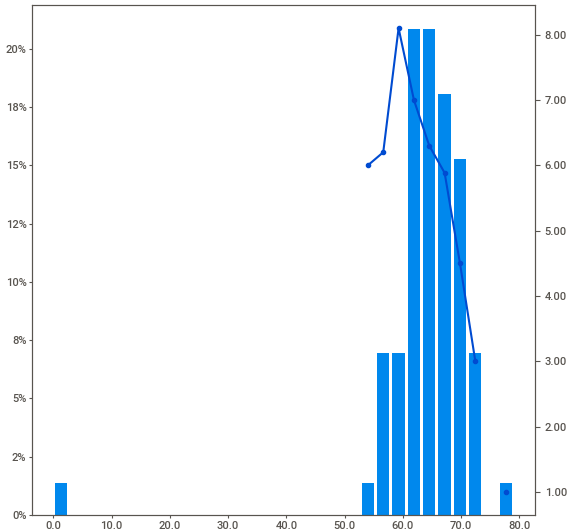
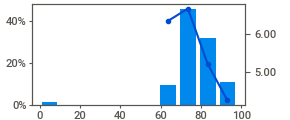
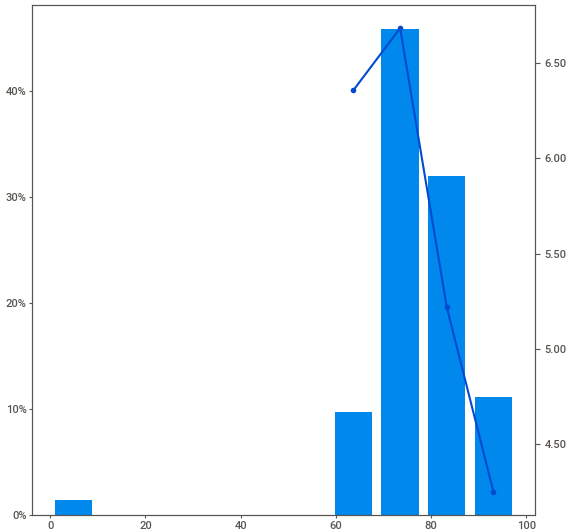
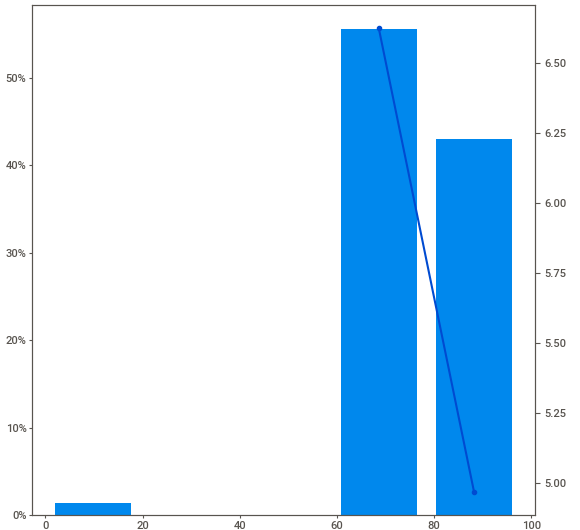
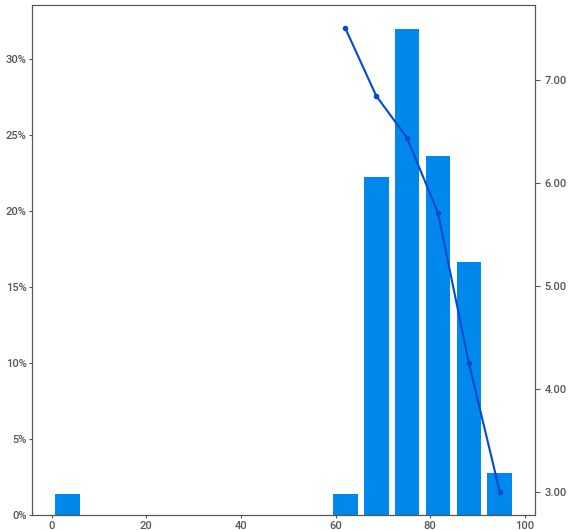
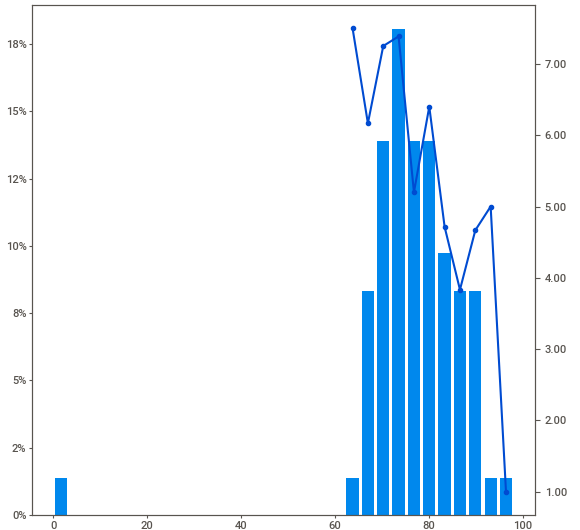
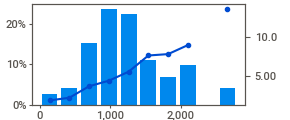
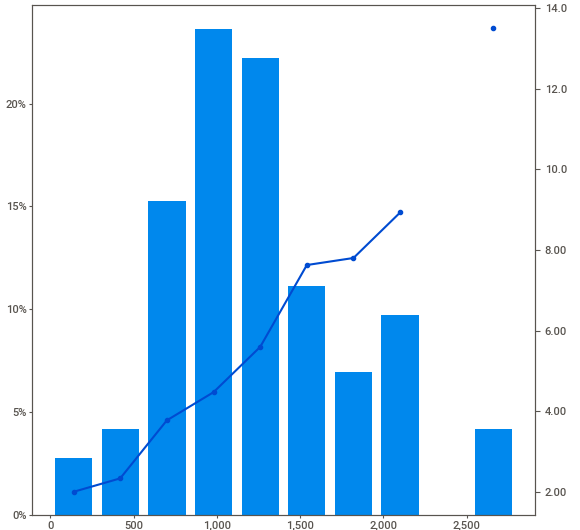
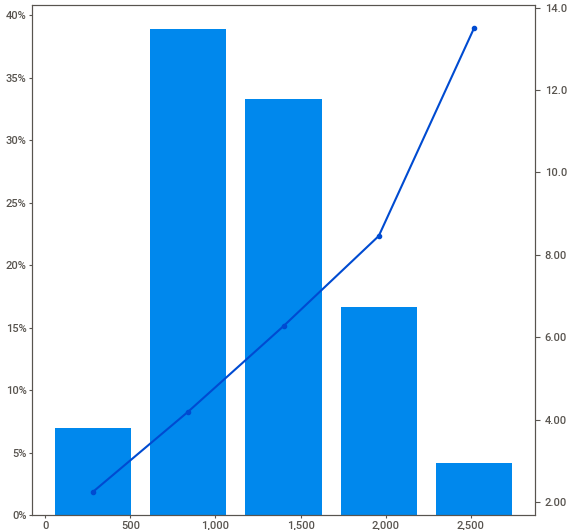
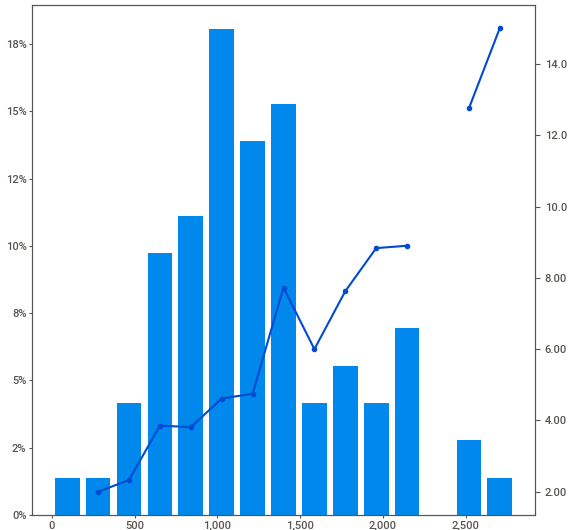
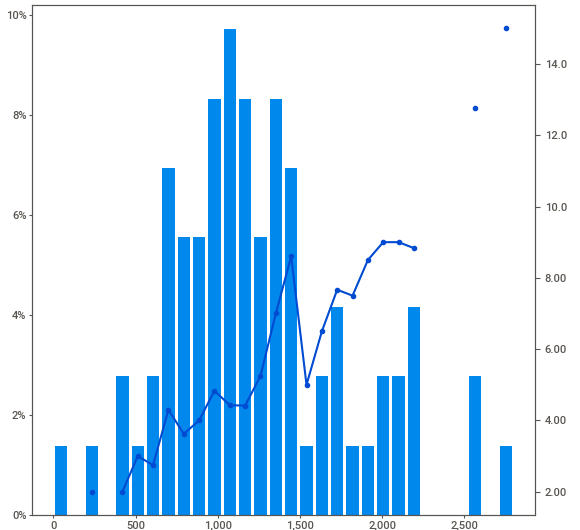
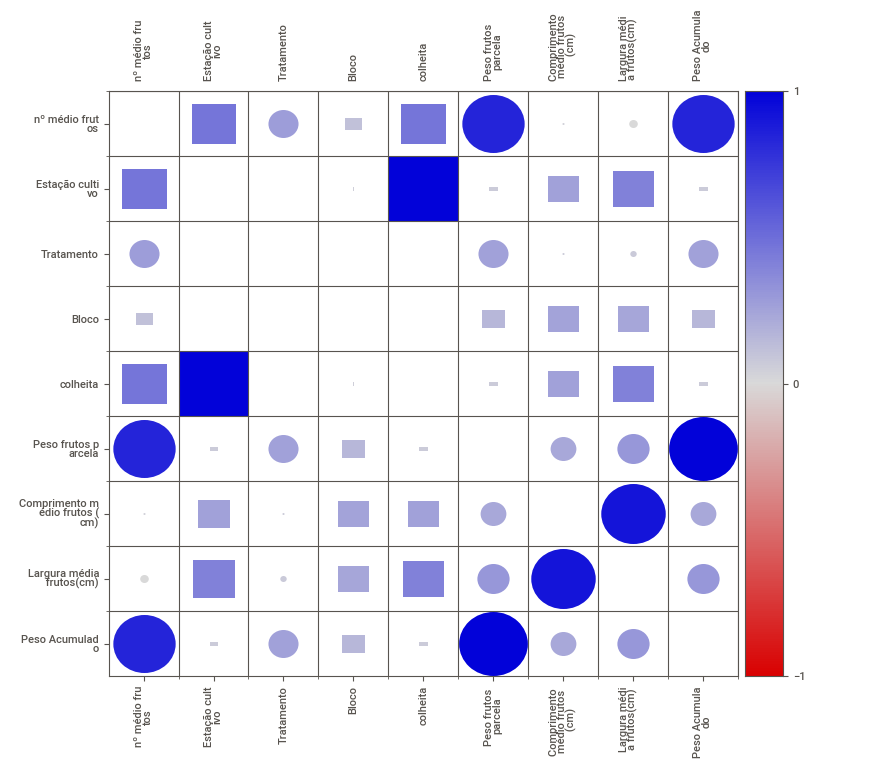
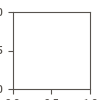

In [ ]:
eda = sv.analyze(source = data,target_feat = 'nº médio frutos',feat_cfg=sv.FeatureConfig(force_num=['nº médio frutos']))
eda.show_notebook()

                                             |          | [  0%]   00:00 -> (? left)


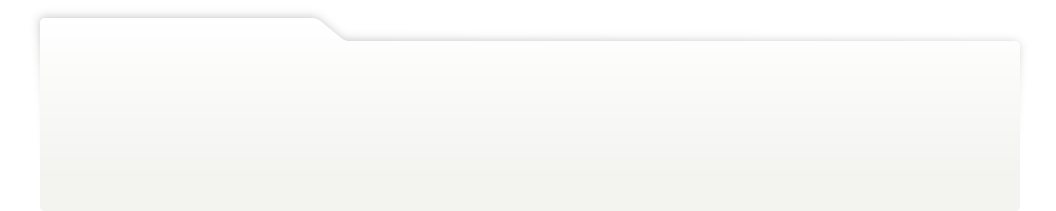
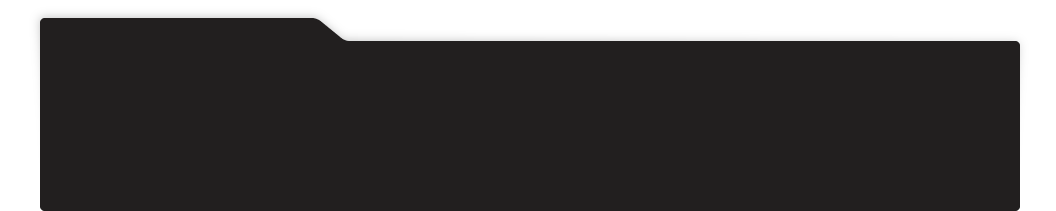
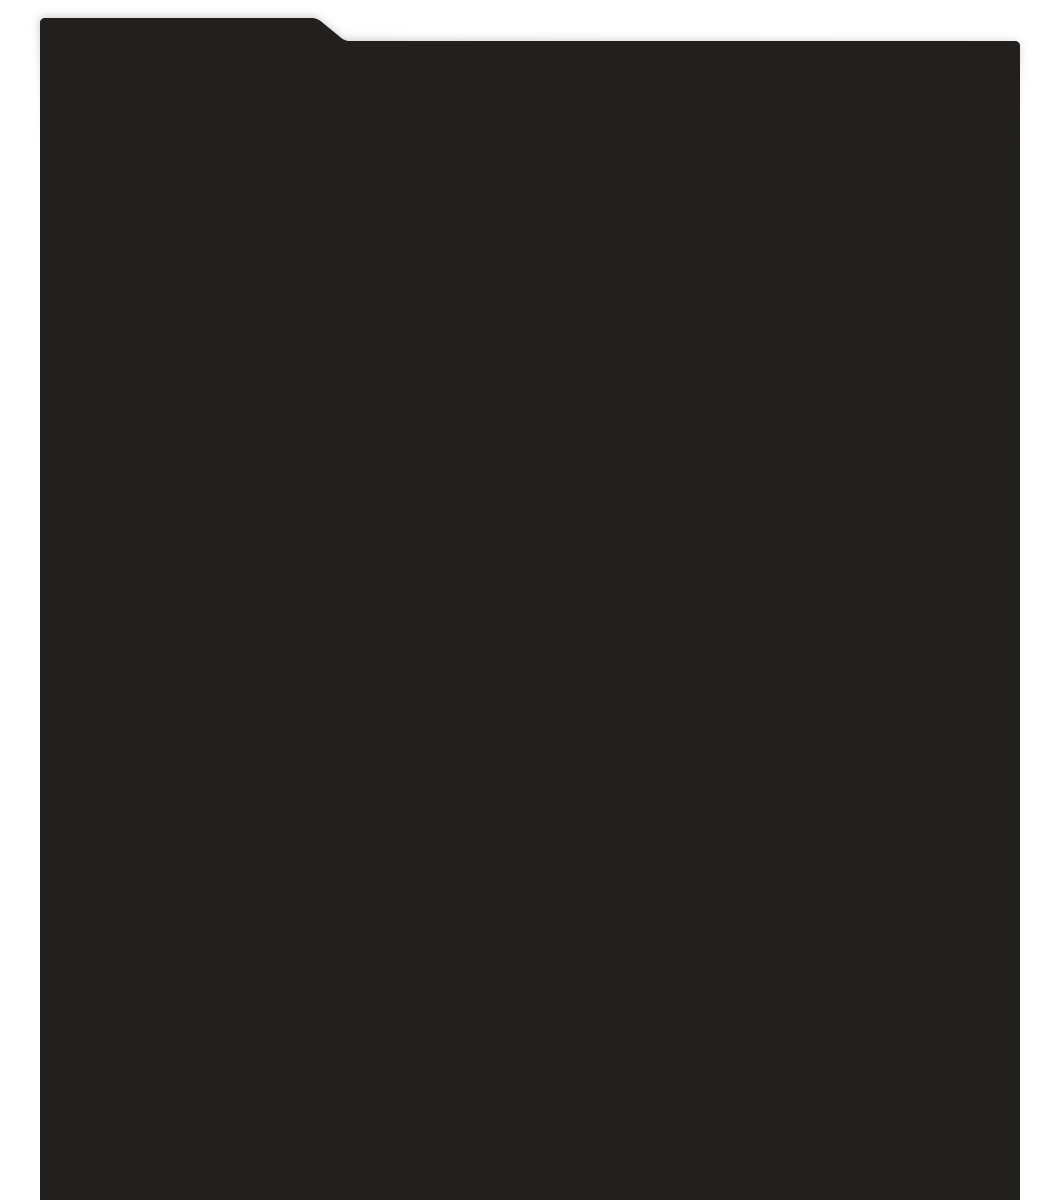
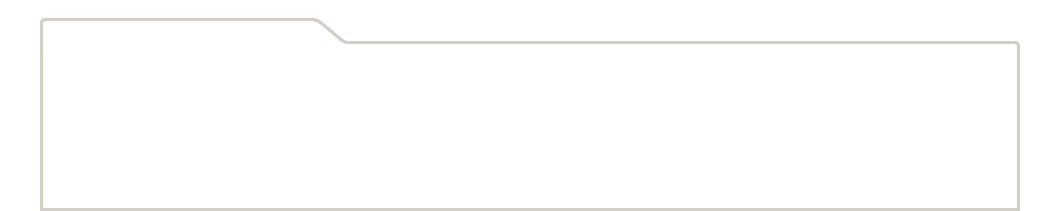
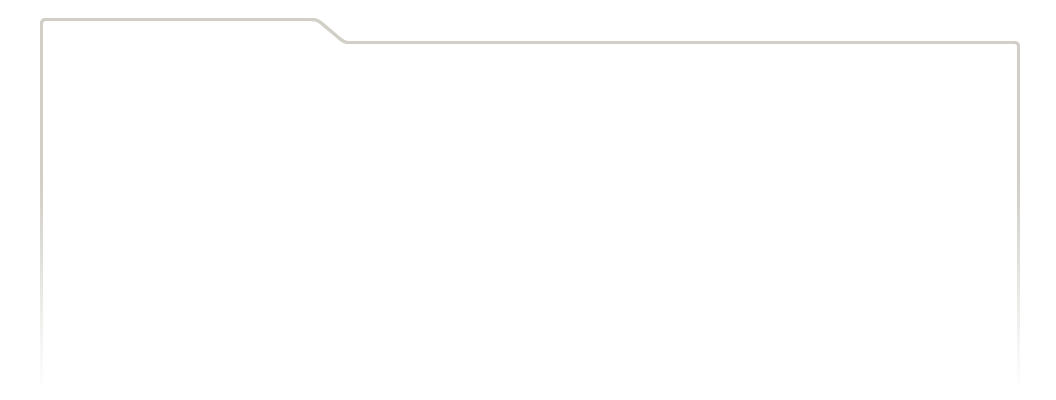
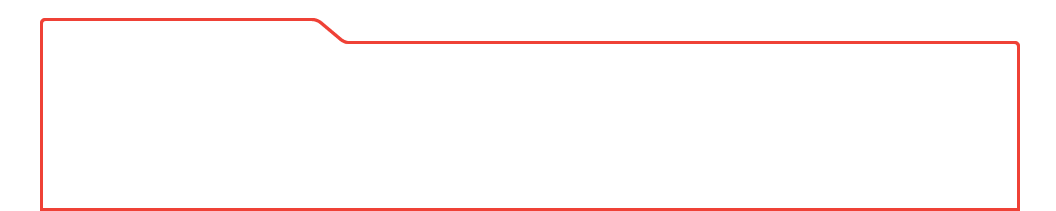
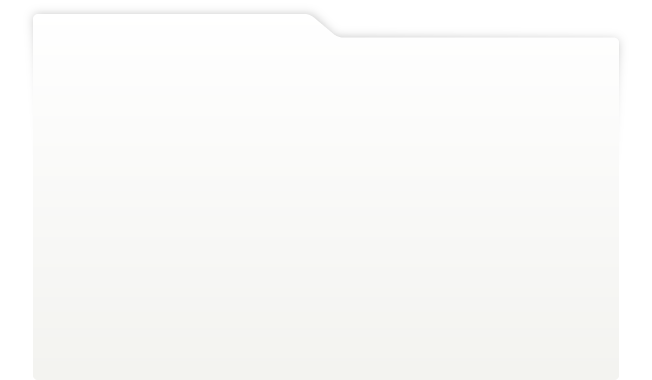
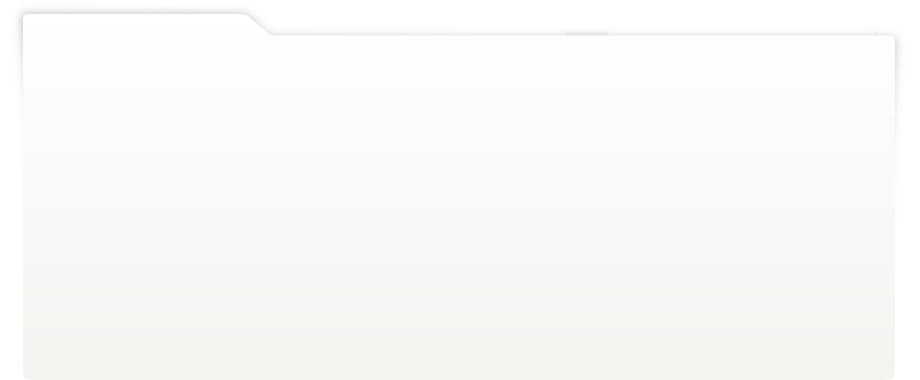
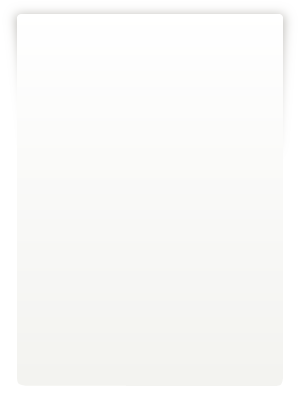
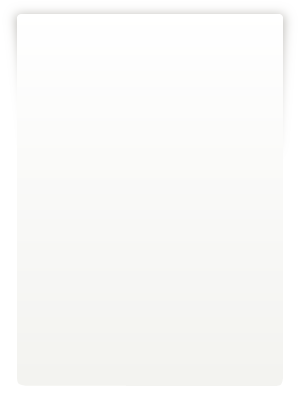
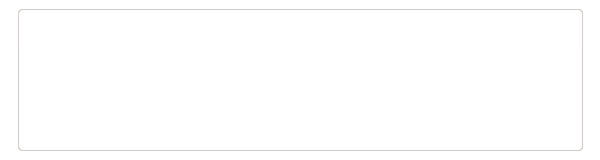
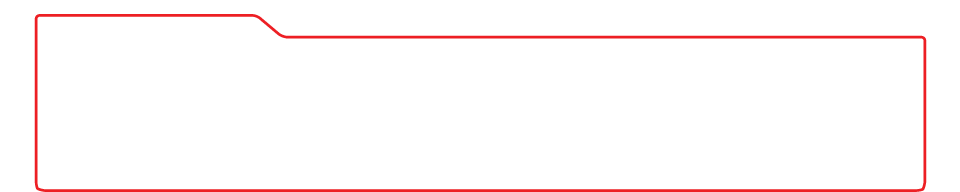
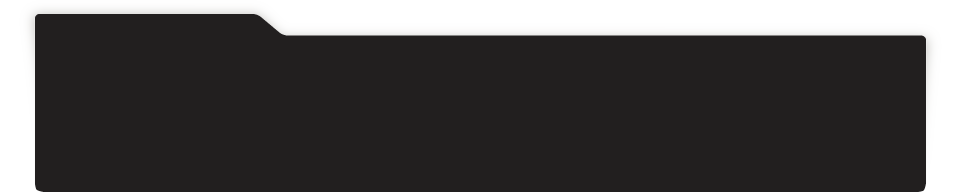
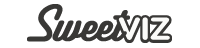
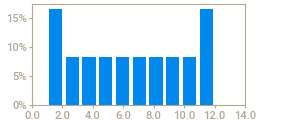
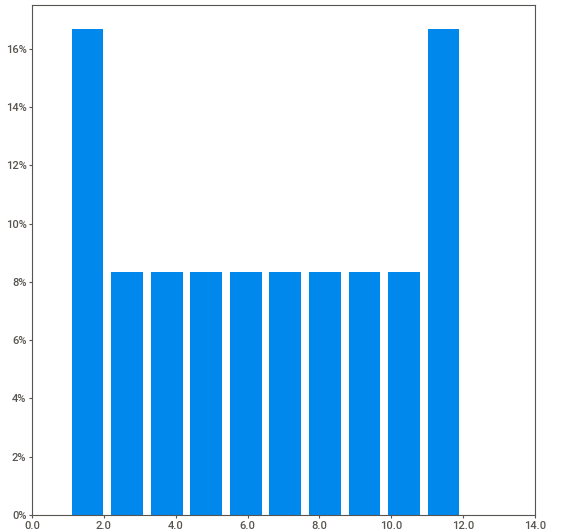
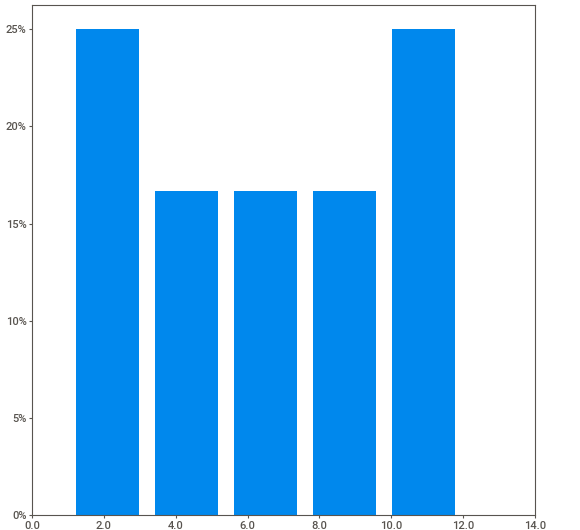
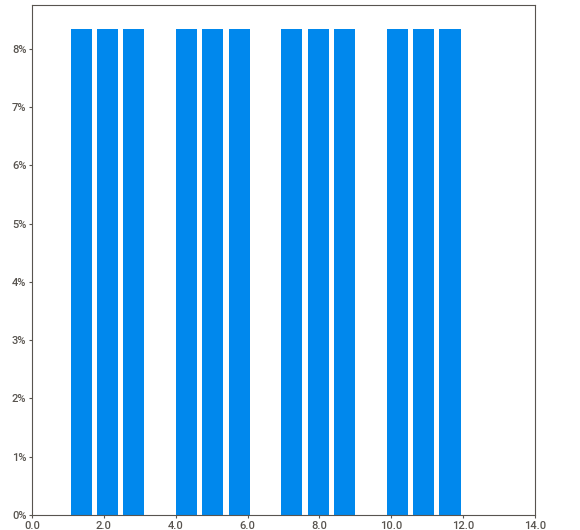
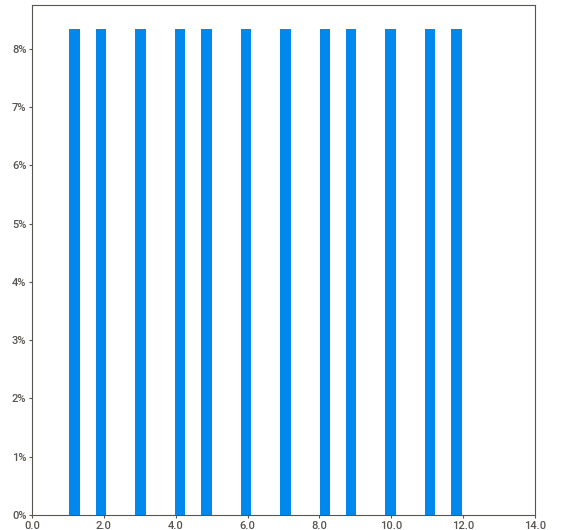
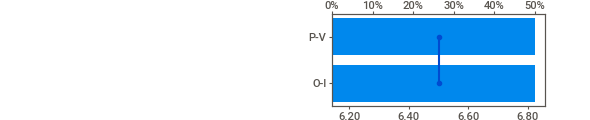
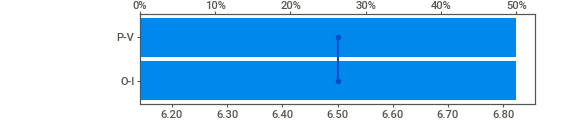
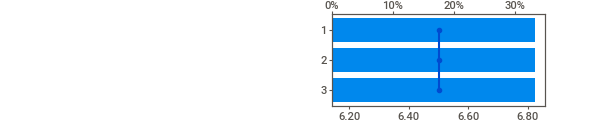
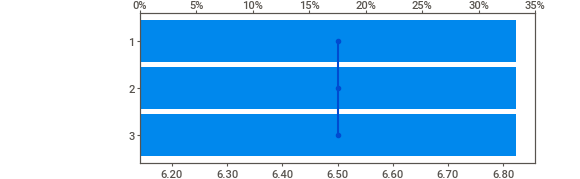
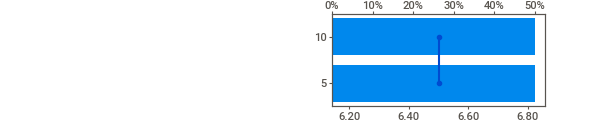
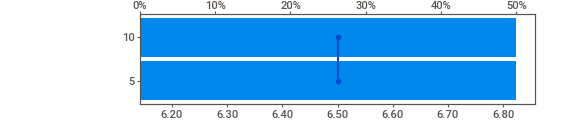
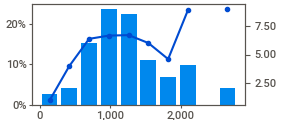
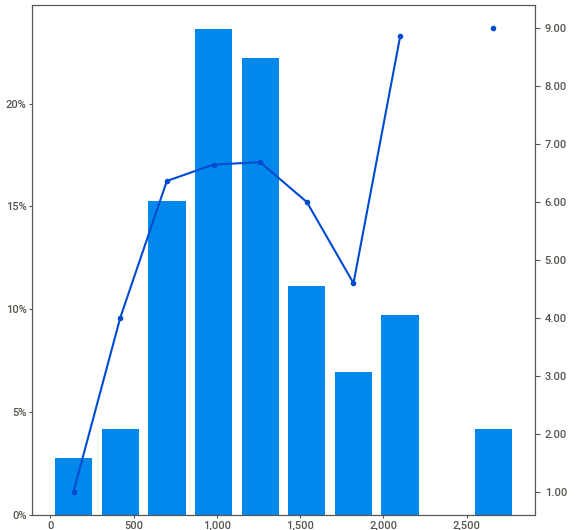
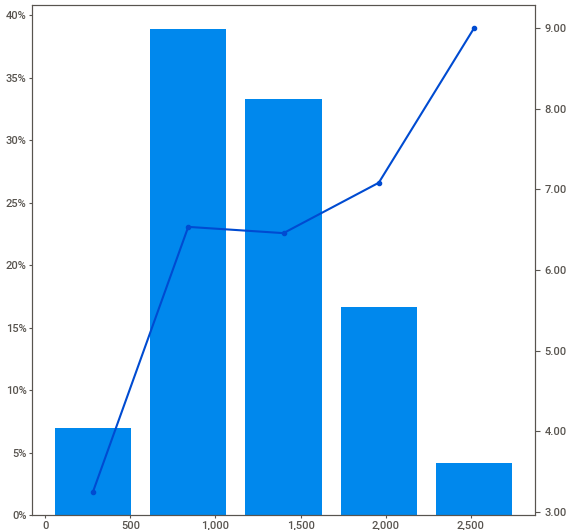
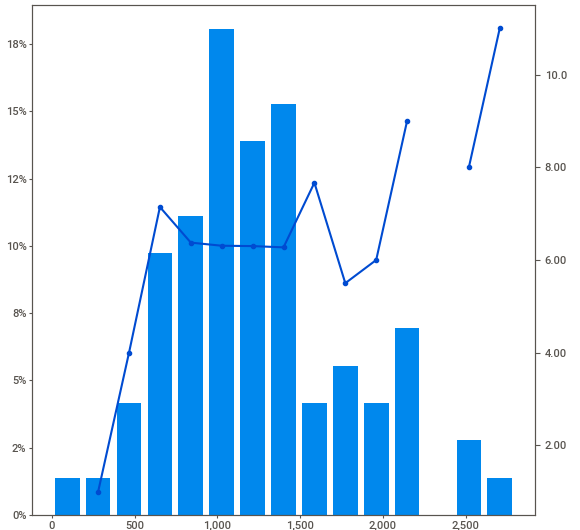
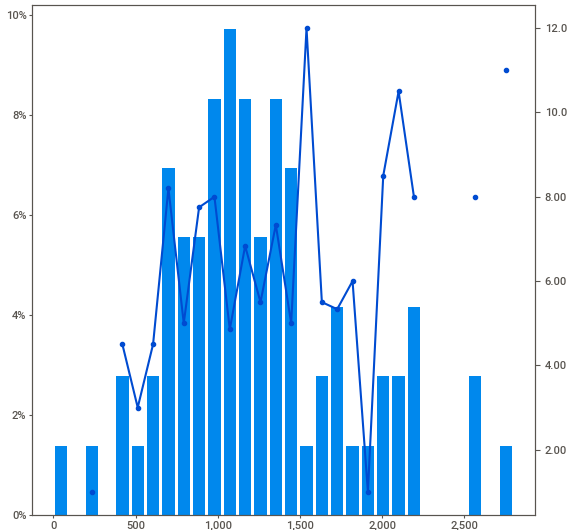
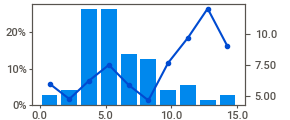
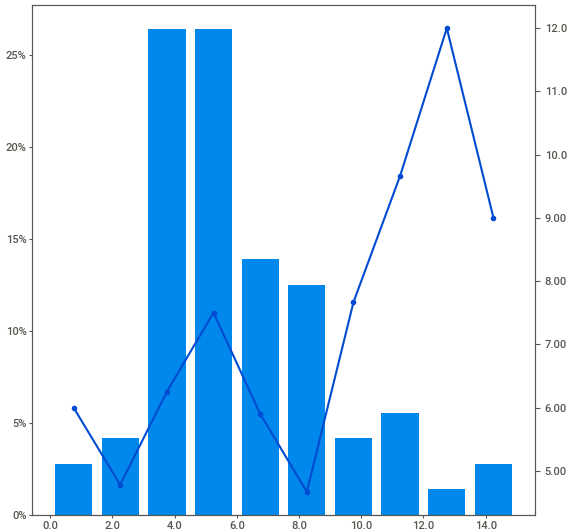
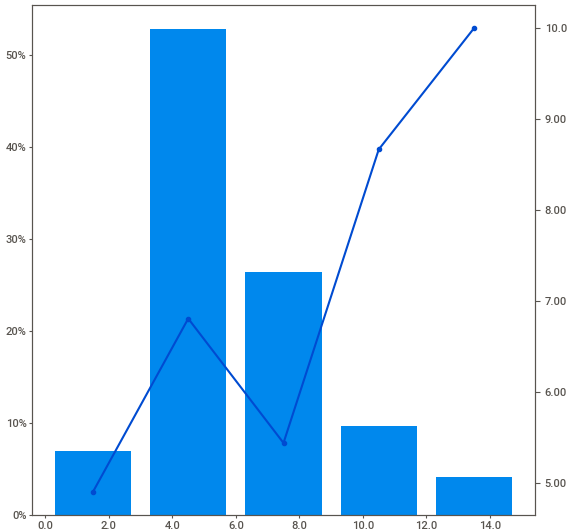
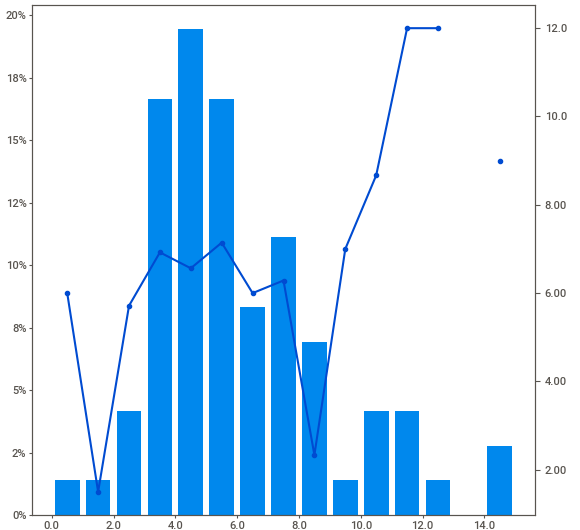
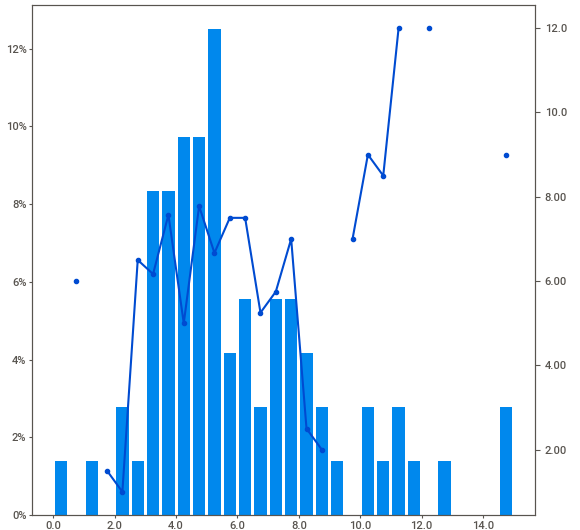
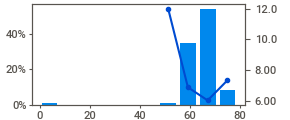
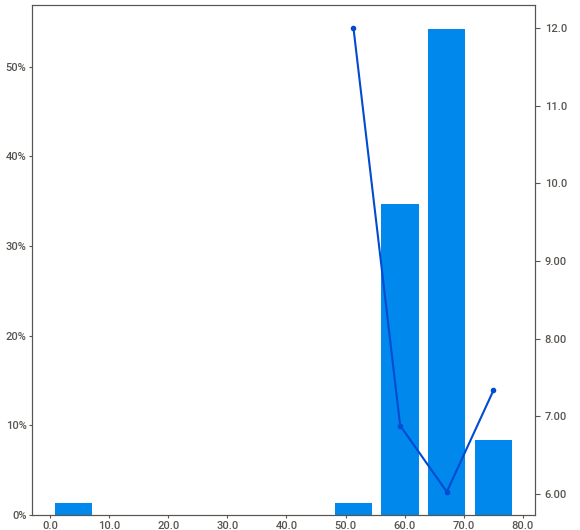
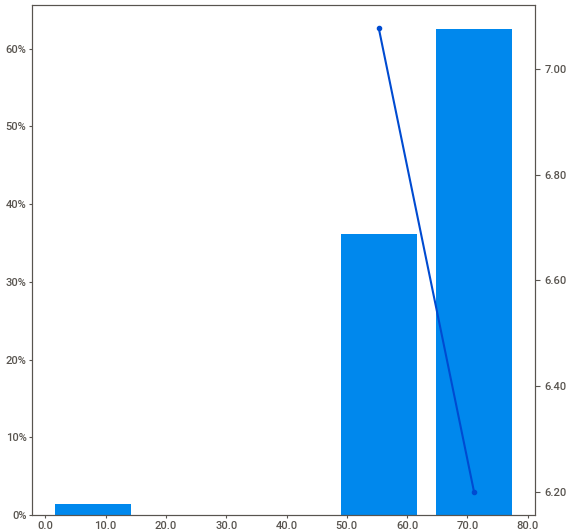
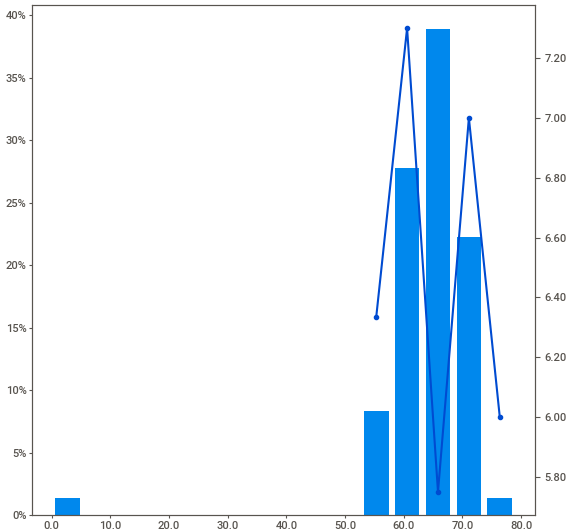
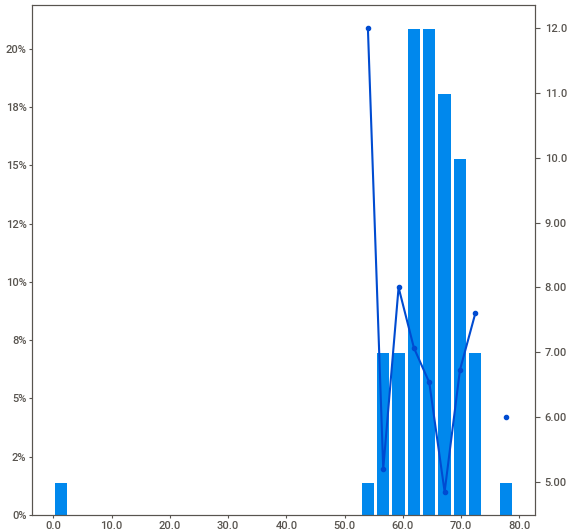
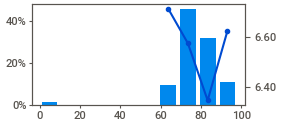
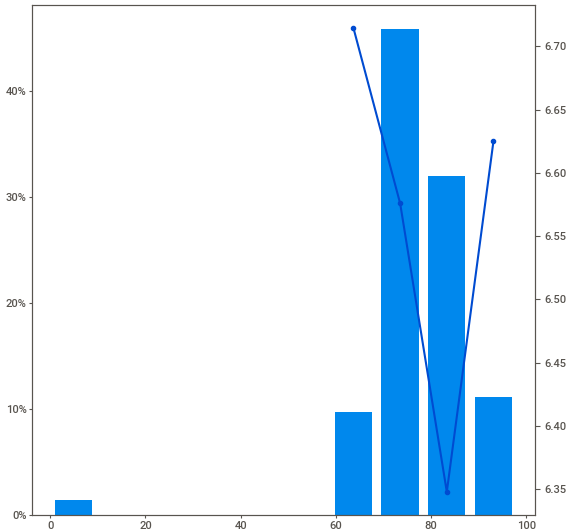
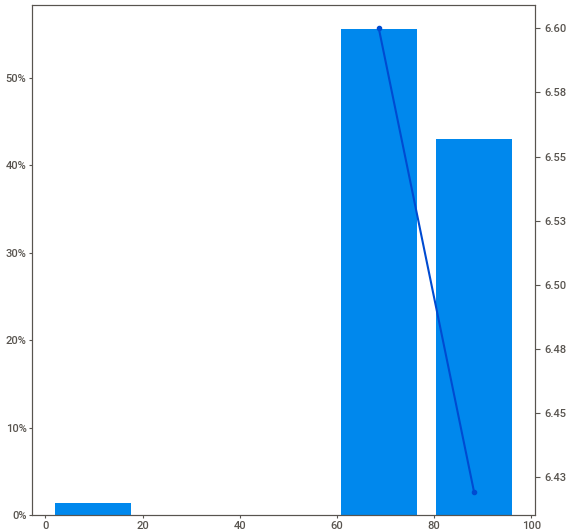
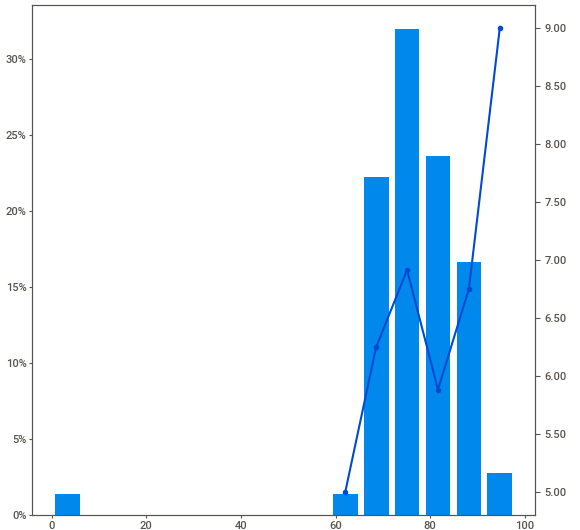
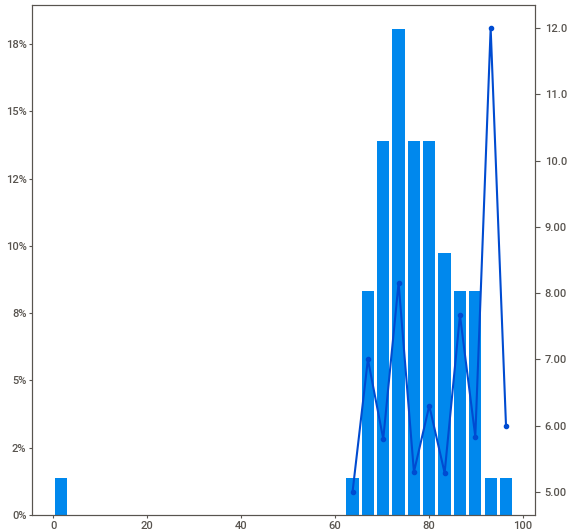
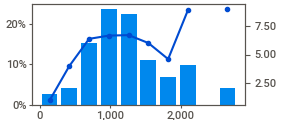
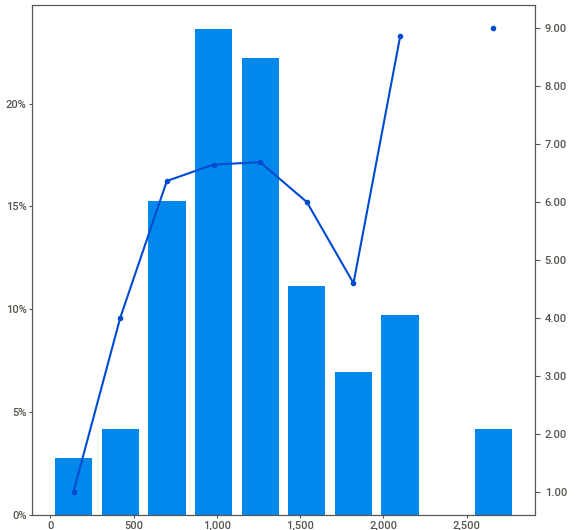
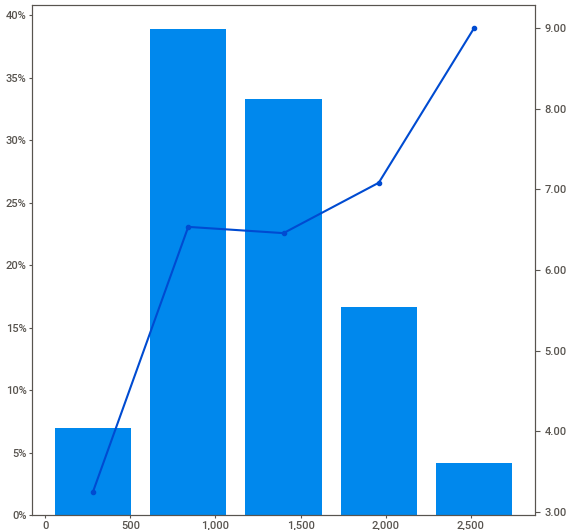
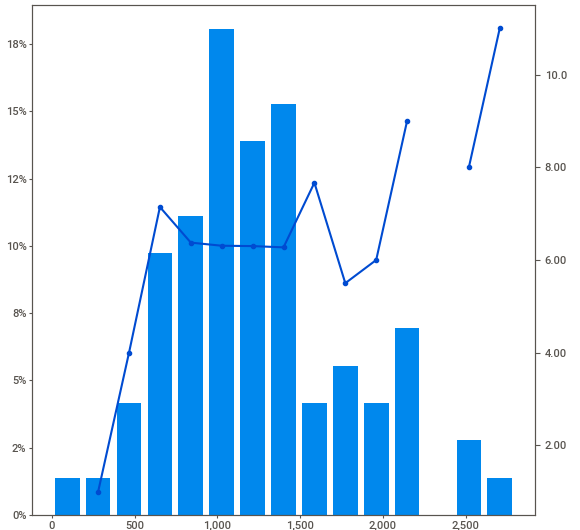
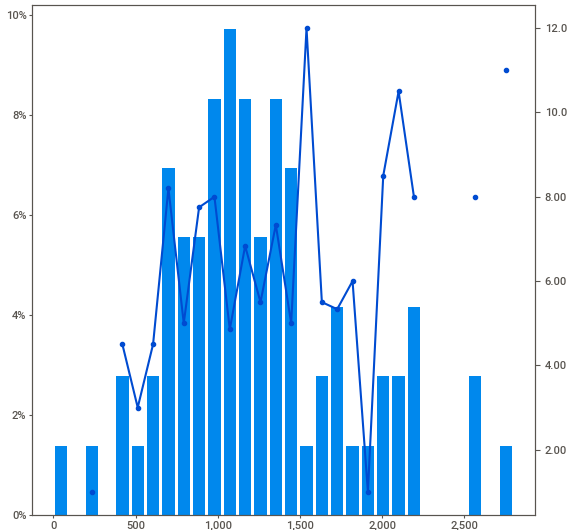
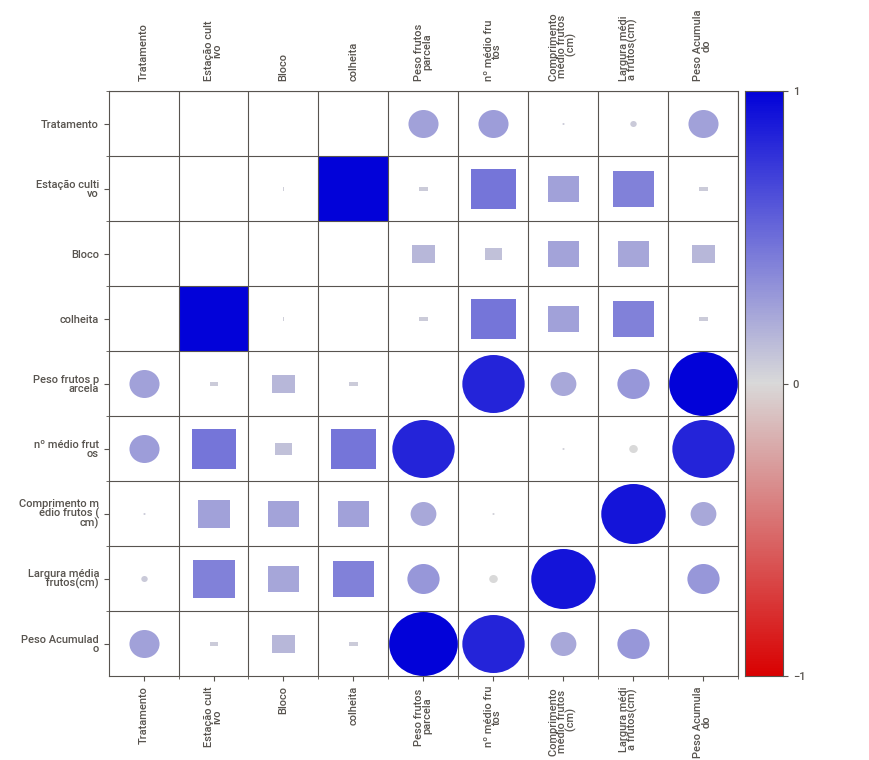
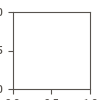

In [ ]:
eda = sv.analyze(source = data,target_feat = 'Tratamento')
eda.show_notebook()

#Gráficos

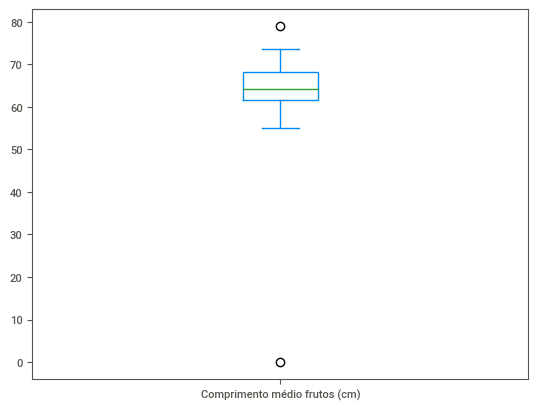

In [ ]:
data['Comprimento médio frutos (cm)'].plot(kind = 'box');

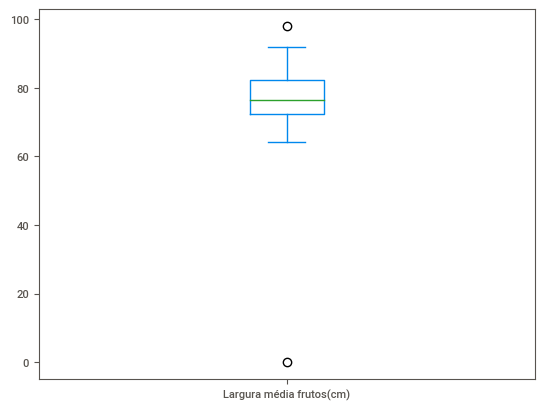

In [ ]:
data['Largura média frutos(cm)'].plot(kind = 'box');

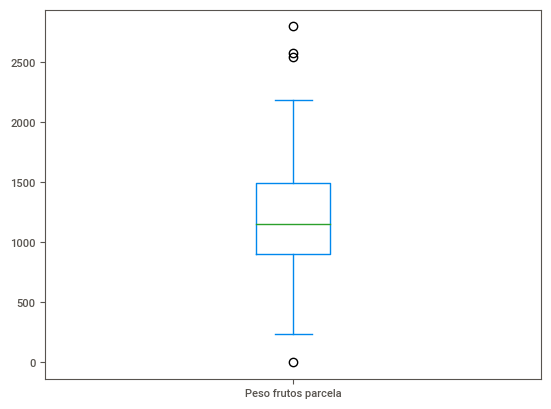

In [ ]:
data['Peso frutos parcela'].plot(kind = 'box');

<Axes: >

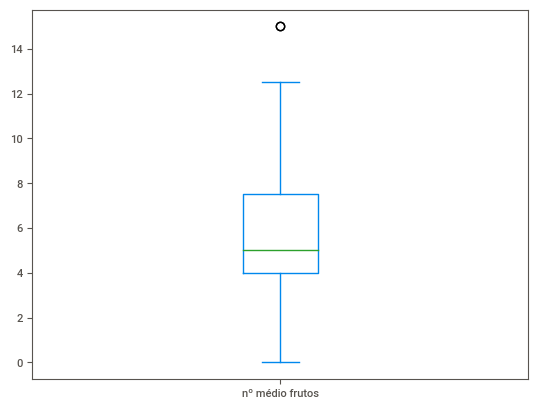

In [ ]:
data['nº médio frutos'].plot(kind = 'box')

#Dummyficação de variáveis

In [ ]:
data_novo = data.drop(["Comprimento médio frutos (cm)", "nº médio frutos","Largura média frutos(cm)", "Peso frutos parcela","colheita"],axis=1)

In [ ]:
data_novo

,Estação cultivo,Tratamento,Bloco,Peso Acumulado
324,P-V,1,1,238.0
325,P-V,1,2,1901.0
326,P-V,1,3,1469.0
327,P-V,2,1,1706.5
328,P-V,2,2,605.5
...,...,...,...,...
535,O-I,11,2,920.0
536,O-I,11,3,1345.0
537,O-I,12,1,1552.0
538,O-I,12,2,1340.0


In [ ]:
variaveis_cat = ['Estação cultivo','Tratamento',"Bloco"]

data_new = pd.get_dummies(data_novo, columns = variaveis_cat, drop_first = True)


data_new.head()

,Peso Acumulado,Estação cultivo_P-V,Tratamento_2,Tratamento_3,Tratamento_4,Tratamento_5,Tratamento_6,Tratamento_7,Tratamento_8,Tratamento_9,Tratamento_10,Tratamento_11,Tratamento_12,Bloco_2,Bloco_3
324,238.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
325,1901.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
326,1469.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
327,1706.5,1,1,0,0,0,0,0,0,0,0,0,0,0,0
328,605.5,1,1,0,0,0,0,0,0,0,0,0,0,1,0


##Normalização/padronização de variáveis continuas

In [ ]:
data_new['Peso Acumulado']=(data_new['Peso Acumulado']-mean(data_new['Peso Acumulado']))/std(data_new['Peso Acumulado'])

In [ ]:
data_new.head()

,Peso Acumulado,Estação cultivo_P-V,Tratamento_2,Tratamento_3,Tratamento_4,Tratamento_5,Tratamento_6,Tratamento_7,Tratamento_8,Tratamento_9,Tratamento_10,Tratamento_11,Tratamento_12,Bloco_2,Bloco_3
324,-1.837910,1,0,0,0,0,0,0,0,0,0,0,0,0,0
325,1.179951,1,0,0,0,0,0,0,0,0,0,0,0,1,0
326,0.395997,1,0,0,0,0,0,0,0,0,0,0,0,0,1
327,0.826991,1,1,0,0,0,0,0,0,0,0,0,0,0,0
328,-1.171004,1,1,0,0,0,0,0,0,0,0,0,0,1,0


#Modelo

In [ ]:
train, test = train_test_split(data_new, test_size=0.25,
                                     random_state=42)

In [ ]:
train

,Peso Acumulado,Estação cultivo_P-V,Tratamento_2,Tratamento_3,Tratamento_4,Tratamento_5,Tratamento_6,Tratamento_7,Tratamento_8,Tratamento_9,Tratamento_10,Tratamento_11,Tratamento_12,Bloco_2,Bloco_3
357,-0.982274,1,0,0,0,0,0,0,0,0,0,0,1,0,0
507,0.026704,0,1,0,0,0,0,0,0,0,0,0,0,0,0
527,0.849674,0,0,0,0,0,0,0,1,0,0,0,0,0,1
340,-0.627499,1,0,0,0,0,1,0,0,0,0,0,0,1,0
359,1.626370,1,0,0,0,0,0,0,0,0,0,0,1,0,1
512,0.640983,0,0,1,0,0,0,0,0,0,0,0,0,0,1
537,0.546618,0,0,0,0,0,0,0,0,0,0,0,1,0,0
331,-1.409638,1,0,1,0,0,0,0,0,0,0,0,0,1,0
523,-0.003239,0,0,0,0,0,0,1,0,0,0,0,0,1,0
510,-0.784471,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from pycaret.regression import *

In [ ]:
exp_clf101 = setup(data = train,           # Banco de dados
              target = 'Peso Acumulado',   # Desfecho que estamos tentando prever
              train_size = 0.9, session_id=123)     # Proporção do banco de treino

,Description,Value
0,Session id,123
1,Target,Peso Acumulado
2,Target type,Regression
3,Original data shape,"(54, 15)"
4,Transformed data shape,"(54, 15)"
5,Transformed train set shape,"(48, 15)"
6,Transformed test set shape,"(6, 15)"
7,Numeric features,14
8,Preprocess,True
9,Imputation type,simple


In [ ]:
mods1=compare_models(fold=10,round=4)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,0.7546,0.9806,0.9317,-0.3469,0.5251,1.1241,0.0700
en,Elastic Net,0.7546,0.9806,0.9317,-0.3469,0.5251,1.1241,0.0720
dummy,Dummy Regressor,0.7546,0.9806,0.9317,-0.3469,0.5251,1.1241,0.0720
llar,Lasso Least Angle Regression,0.7546,0.9806,0.9317,-0.3469,0.5251,1.1241,0.0760
lightgbm,Light Gradient Boosting Machine,0.7669,1.0037,0.9424,-0.3695,0.5120,1.3556,0.1660
br,Bayesian Ridge,0.7877,1.0395,0.9641,-0.4462,0.4859,1.9133,0.0710
omp,Orthogonal Matching Pursuit,0.7638,0.9930,0.9361,-0.5473,0.5051,3.0233,0.0690
knn,K Neighbors Regressor,0.8803,1.2350,1.0600,-1.0121,0.4332,4.9608,0.1290
ridge,Ridge Regression,0.8435,1.1288,1.0374,-1.1246,0.4636,2.6478,0.0710
rf,Random Forest Regressor,0.8850,1.2675,1.0898,-1.3832,0.4540,3.1206,0.3320


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

#Predições

In [ ]:
a=predict_model(mods1, data=test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,0.8617,1.0389,1.0192,-0.0659,0.5856,1.0377


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
mae = mean_absolute_error(a['Peso Acumulado'], a['prediction_label'])
mse = mean_squared_error(a['Peso Acumulado'], a['prediction_label'])
rmse = np.sqrt(mse)
r2 = r2_score(a['Peso Acumulado'], a['prediction_label'])

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 0.8616717071094576
Mean Squared Error (MSE): 1.0388673498774297
Root Mean Squared Error (RMSE): 1.019248424024992
R-squared (R2): -0.06589042349673546


#seleção de variáveis


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
data_new

,Peso Acumulado,Estação cultivo_P-V,Tratamento_2,Tratamento_3,Tratamento_4,Tratamento_5,Tratamento_6,Tratamento_7,Tratamento_8,Tratamento_9,Tratamento_10,Tratamento_11,Tratamento_12,Bloco_2,Bloco_3
324,-1.837910,1,0,0,0,0,0,0,0,0,0,0,0,0,0
325,1.179951,1,0,0,0,0,0,0,0,0,0,0,0,1,0
326,0.395997,1,0,0,0,0,0,0,0,0,0,0,0,0,1
327,0.826991,1,1,0,0,0,0,0,0,0,0,0,0,0,0
328,-1.171004,1,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,-0.600278,0,0,0,0,0,0,0,0,0,0,1,0,1,0
536,0.170973,0,0,0,0,0,0,0,0,0,0,1,0,0,1
537,0.546618,0,0,0,0,0,0,0,0,0,0,0,1,0,0
538,0.161900,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [ ]:
X = data_new.drop('Peso Acumulado', axis=1)  # Variáveis preditoras (removendo a coluna "target")
y = data_new['Peso Acumulado']

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)


In [ ]:
model.fit(X, y)

RandomForestRegressor(random_state=42)

In [ ]:
importances = model.feature_importances_

In [ ]:
feature_importances = pd.Series(importances, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print(feature_importances)

Estação cultivo_P-V    0.195120
Bloco_3                0.140494
Bloco_2                0.117682
Tratamento_9           0.093162
Tratamento_5           0.075447
Tratamento_7           0.062333
Tratamento_12          0.054092
Tratamento_3           0.050278
Tratamento_6           0.049992
Tratamento_8           0.046675
Tratamento_11          0.041030
Tratamento_2           0.033733
Tratamento_10          0.022427
Tratamento_4           0.017535
dtype: float64


In [ ]:
data

,Estação cultivo,Tratamento,Bloco,colheita,Peso frutos parcela,nº médio frutos,Comprimento médio frutos (cm),Largura média frutos(cm),Peso Acumulado
324,P-V,1,1,10,238.0,2.0,71.500000,75.500000,238.0
325,P-V,1,2,10,1901.0,8.5,67.647059,78.941176,1901.0
326,P-V,1,3,10,1469.0,7.0,66.714286,79.714286,1469.0
327,P-V,2,1,10,1706.5,9.0,58.500000,77.055556,1706.5
328,P-V,2,2,10,605.5,2.0,63.000000,71.166667,605.5
...,...,...,...,...,...,...,...,...,...
535,O-I,11,2,5,920.0,3.0,69.666667,87.333333,920.0
536,O-I,11,3,5,1345.0,5.0,69.100000,79.700000,1345.0
537,O-I,12,1,5,1552.0,5.0,69.900000,92.000000,1552.0
538,O-I,12,2,5,1340.0,5.0,70.100000,81.900000,1340.0
